# Unsupervised Learning
### K-Means Clustering

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.style
import numpy as np
from sklearn.cluster import KMeans
matplotlib.style.use("classic")

In [272]:
df = pd.DataFrame(data={'x0':[0,0,1,7,5,7,3,4,1,0,2,8,5,6,5,3],
                        'x1':[1,2,1.5,5,7,7,3,6,4,0,2,7,8,5,5,7]})
df

,x0,x1
0,0,1.0
1,0,2.0
2,1,1.5
3,7,5.0
4,5,7.0
5,7,7.0
6,3,3.0
7,4,6.0
8,1,4.0
9,0,0.0


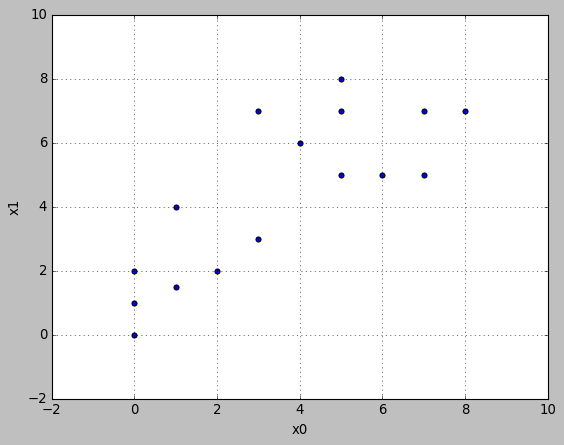

In [273]:
plt.scatter(df['x0'],df['x1'])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()

In [274]:
kmeans=KMeans(n_clusters = 2,init='random')#initializing at any random point

In [275]:
y_kmeans=kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [276]:
kmeans=kmeans.fit(df)

# Centroid

In [277]:
c=kmeans.cluster_centers_
c

array([[1.        , 1.92857143],
       [5.55555556, 6.33333333]])

In [278]:
# df.drop(['plot'],axis=1,inplace=True)

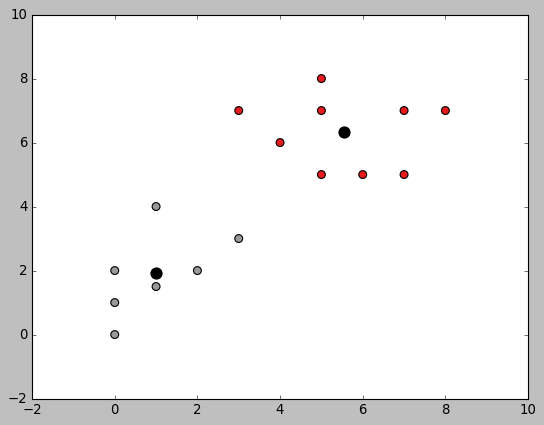

In [279]:
plt.scatter(df['x0'],df['x1'],c=y_kmeans,s=50,cmap='Set1')# We can also use cmap='Set1'

plt.scatter(c[:,0],c[:,1],color ='Black',s=100)

In [280]:
print("clusters found in {0} iterations".format(kmeans.n_iter_))

clusters found in 2 iterations


# Cluster seperation

In [281]:
cluster1=df[y_kmeans == 0]
cluster2=df[y_kmeans == 1]
# cluster3=df[y_kmeans == 2]

In [282]:
centroid1=c[0]
centroid2=c[1]
# centroid3=c[2]

# Checking mean of Centroid distances with eachpoint

In [283]:
distance1=cluster1.apply(lambda x: np.sqrt((x[0]-centroid1[0])**2+(x[1]-centroid1[1])**2) , axis=1)
print(distance1.mean())
distance2=cluster2.apply(lambda x: np.sqrt((x[0]-centroid2[0])**2+(x[1]-centroid2[1])**2) , axis=1)
print(distance2.mean())
# distance3=cluster3.apply(lambda x: np.sqrt((x[0]-centroid3[0])**2+(x[1]-centroid3[1])**2) , axis=1)
# print(distance3.mean())


6.487825567385386
6.391053299732983


In [284]:
ssd=dict()
for i in range(1,10):
        kmeans1=KMeans(n_clusters = i,init='k-means++',max_iter=1000).fit(df)
        ssd[i]=kmeans1.inertia_#storing sum of square values
print(ssd)
#k-means++ ignores the grouped point distance claculation   

{1: 206.546875, 2: 48.43650793650794, 3: 32.614285714285714, 4: 21.3375, 5: 14.1875, 6: 10.9375, 7: 7.9375, 8: 6.4375, 9: 4.625}


Text(0, 0.5, 'Sum of squares of distance or Inertia')

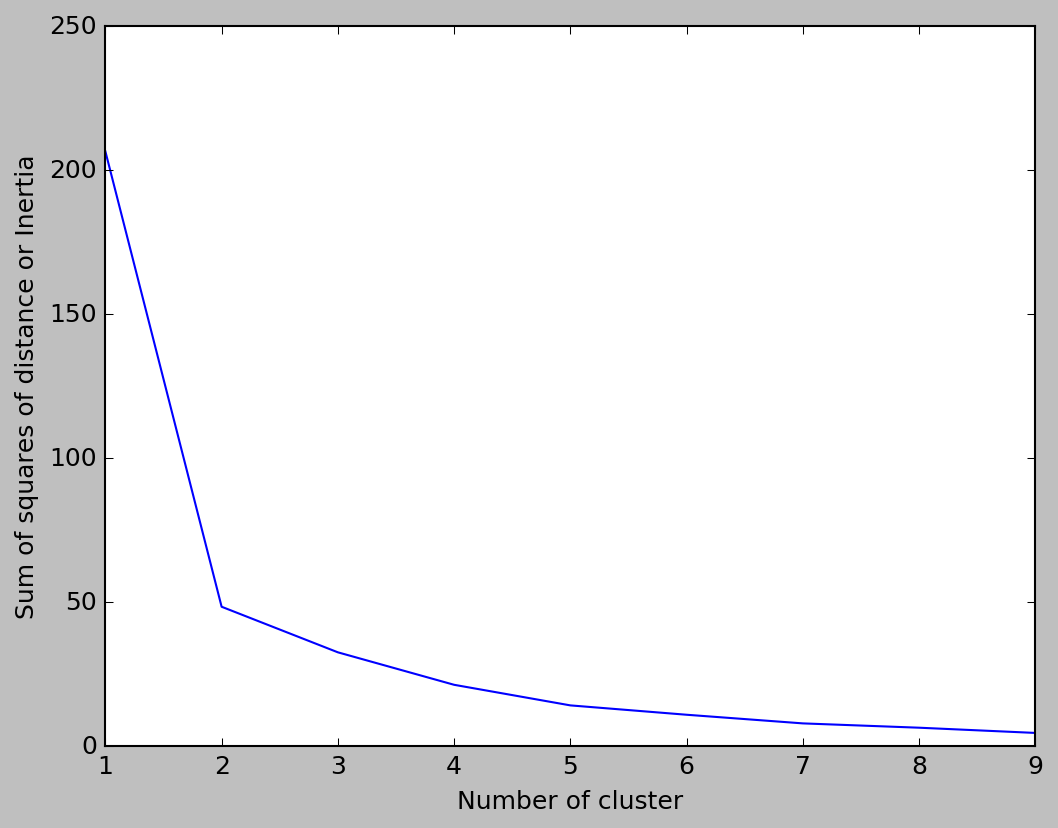

In [285]:
plt.figure(dpi=150)
plt.plot(list(ssd.keys()),list(ssd.values()))
plt.xlabel('Number of cluster')
plt.ylabel('Sum of squares of distance or Inertia')